# Classification Comparison Project  
By: Avinash Bisram

This project aims to juxtapose the intuition and implementation of various supervised classification ML models and find the most accurate one in relation to the goal of classifying labeled data.

It contains the following sections...  
1. Data Selection
2. Initial Data Exploration
3. Data Cleaning
4. Exploratory Data Analysis
5. Machine Learning Intuition
6. Preprocessing
7. Model Creation and Training
8. Model Evaluation
9. Best Model Selection and Dataset Insights
10. Model Generalization
11. Model Productionization
12. Next Steps

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

## Data Selection

The data that will be used in this project is the "Mushroom Classification" dataset by UCI Machine Learning. It was downloaded from Kaggle [here](https://www.kaggle.com/datasets/uciml/mushroom-classification), and can be found in this project's repository as "mushrooms.csv".  
It contains information about mushrooms as well as labels for each record indicating if the mushroom is edible or poisonous.

Attribute Information:
- (TARGET) classes: edible=e, poisonous=p
- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [2]:
# Storing the dataset in a DataFrame

rawData = pd.read_csv('mushrooms.csv')

## Initial Data Exploration

In [3]:
# Viewing the head of the DataFrame to get a general idea of how it looks

rawData.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# Dataset Shape

rawData.shape

# 8124 Observations (rows), 23 Features (columns)

(8124, 23)

In [5]:
# Column Names

rawData.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
# Column Datatypes

rawData.dtypes

# All feature data types seem to be in line with what we expect based on the Attribute Information above.

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [7]:
# Descriptive Statistics

# Since all of our features are categorical and non-numeric, it is not appropriate to view descriptive statistics
# right now.

# rawData.describe()

In [8]:
# Identifying Missing data

rawData.isnull().sum().sort_values()

# It looks like none of our features contain missing data.

class                       0
spore-print-color           0
ring-type                   0
ring-number                 0
veil-color                  0
veil-type                   0
stalk-color-below-ring      0
stalk-color-above-ring      0
stalk-surface-below-ring    0
stalk-surface-above-ring    0
population                  0
stalk-root                  0
gill-color                  0
gill-size                   0
gill-spacing                0
gill-attachment             0
odor                        0
bruises                     0
cap-color                   0
cap-surface                 0
cap-shape                   0
stalk-shape                 0
habitat                     0
dtype: int64

In [9]:
# Identifying Duplicate Records

rawData.duplicated().sum()

# It appears that we do not have any duplicate records in this dataset either.

0

In [10]:
# A nice method call that displays column names, indirect null counts, and feature data types

rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## Data Cleaning

In [11]:
# We saw above that our dataset has...
    # No missing values
    # No duplicate records
    # Appropriate feature datatypes

# The last consideration we need to make is whether any features contain typos (multiple strings being used to refer to the
# same category). We will check each feature for this now.

In [12]:
print("Feature\t| Unique Values\n")
for column in rawData.columns:
    print(f"{column}\t{sorted(rawData[column].unique())}")
    
# There does not appear to be any typos when comparing this list of values with the Attribute Information of the source.

Feature	| Unique Values

class	['e', 'p']
cap-shape	['b', 'c', 'f', 'k', 's', 'x']
cap-surface	['f', 'g', 's', 'y']
cap-color	['b', 'c', 'e', 'g', 'n', 'p', 'r', 'u', 'w', 'y']
bruises	['f', 't']
odor	['a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y']
gill-attachment	['a', 'f']
gill-spacing	['c', 'w']
gill-size	['b', 'n']
gill-color	['b', 'e', 'g', 'h', 'k', 'n', 'o', 'p', 'r', 'u', 'w', 'y']
stalk-shape	['e', 't']
stalk-root	['?', 'b', 'c', 'e', 'r']
stalk-surface-above-ring	['f', 'k', 's', 'y']
stalk-surface-below-ring	['f', 'k', 's', 'y']
stalk-color-above-ring	['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y']
stalk-color-below-ring	['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y']
veil-type	['p']
veil-color	['n', 'o', 'w', 'y']
ring-number	['n', 'o', 't']
ring-type	['e', 'f', 'l', 'n', 'p']
spore-print-color	['b', 'h', 'k', 'n', 'o', 'r', 'u', 'w', 'y']
population	['a', 'c', 'n', 's', 'v', 'y']
habitat	['d', 'g', 'l', 'm', 'p', 'u', 'w']


## Exploratory Data Analysis

As this data is completely categorical and non-numeric, in our EDA process we are going to visualize the distribution of each class within our dataset as a whole and in relation to our target feature ('class').  

Our goals in this process are:
1. understand the distribution and balance of values within each feature
2. gain insight on the distribution of our target variable within each feature

Generally speaking, we want to avoid imbalance in the total counts of values within each feature (this is very important for our target feature but is also beneficial for independent features to generalize well with unseen data). However, it can be beneficial to have an imbalance in our class feature within each value of our independent features. This means some values in each feature have high amounts of one class over others. This occurence might point us to indicative attributes of our records (in this case attributes of mushrooms) that can help correctly differentiate their 'class' (whether they are poisonous or not).

Miscellaneous goals within this EDA process also include:
1. identifying potential outliers
2. feature selection or need for additional data cleaning (insignificant features can be dropped to improve compute time)

### EDA Helper Functions

In [13]:
'''Given a feature, visualize the counts of each value within and the breakdown of "class" for each value'''

def visualizeCounts(columnName):
    plt.figure(figsize=(12,6))

    plt.subplot(1,2,1)
    sns.countplot(x=rawData[columnName])
    plt.title(f"Count Plot of '{columnName}'")
    
    plt.subplot(1,2,2)
    sns.countplot(data=rawData, x=columnName, hue='class')
    plt.title(f"Distribution of 'Class' within '{columnName}'")
    plt.legend(title='class', loc=('upper left'), bbox_to_anchor=(1,1))

    plt.show()

In [14]:
'''Display the percentages of each unique value within a given feature'''

def valuePercentages(columnName):
    print(f"{columnName} | Percentage")
    print( round(rawData[columnName].value_counts() / rawData.shape[0] * 100, 2))

In [15]:
'''Display the percentages of "class" within a given feature'''

def classPercentages(columnName):
    
    def calculatePercentage(row):
        return round(row[0] / valueCounts[row[columnName]] * 100,2)
    
    valueCounts = rawData[columnName].value_counts()
    
    tempPercentages = rawData[[columnName,'class']].groupby([columnName,'class']).agg(len).reset_index().copy(deep=True)
    tempPercentages[0] = tempPercentages.apply(calculatePercentage, axis=1)
    tempPercentages.set_index(columnName, inplace=True)
    tempPercentages.rename({0:'%'},axis=1, inplace=True)
    
    print(tempPercentages)

### 'Class' (our Target)

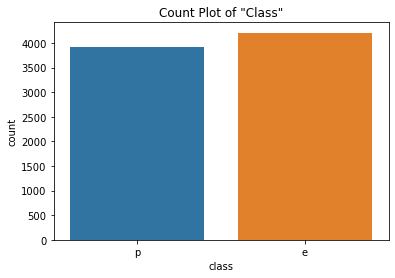

In [16]:
# 'Class' (our Target Feature)

sns.countplot(x=rawData['class'])
plt.title('Count Plot of "Class"')
plt.show()

# We can see that both distinct values in the 'class' feature have roughly the same count.
# This is good because if our target feature was unbalanced and had a large majority of one value over another,
# our Classification models could just identify most/all records as that majority value giving us a high accuracy
# but largely misclassifying records of the other category.

# Example, if our dataset had 99% dogs and 1% cats, our model could label everything as a dog and achieve 99% accuracy.
# However, it would be terrible at correctly identifying cats!

In [17]:
# Let's express the counts from above as percentages

print('Class | Percentage')
round(rawData['class'].value_counts() / rawData.shape[0] *100,2)

# There are slightly more edible mushrooms in our dataset than poisonous but these values can still be considered "balanced"
# since the minority class ('p') has a percentage > 40%.

Class | Percentage


e    51.8
p    48.2
Name: class, dtype: float64

### Cap Shape

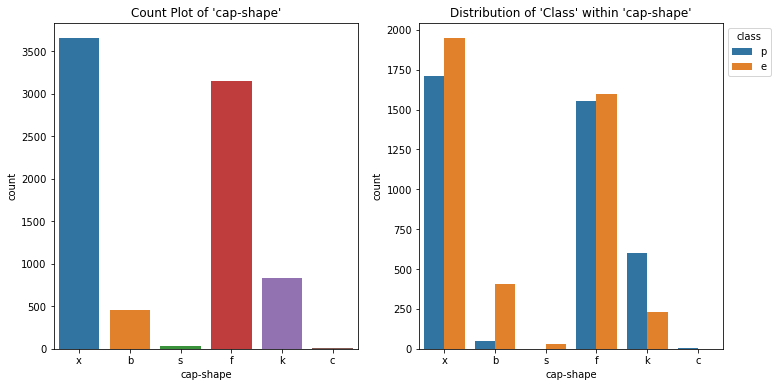

In [18]:
# 'Cap Shape'

visualizeCounts('cap-shape')

# LEFT FIGURE:
# This feature appears quite unbalanced with very large counts for cap shapes of 'x' and 'f' with very few for cap shapes
# of 's' and 'c'.

# RIGHT FIGURE:
# Here, we are looking for large differences in counts WITHIN each distinct cap shape. We can see a relatively significant
# difference in counts for poisonous and edible mushrooms when cap shapes are 'b' (possible 'x' and 'k' as well).
# It is hard to visually discern significant differences in cap shapes of 's' and 'c' due to their small total counts.

In [19]:
# Let's take a quick look at the value counts for Cap Shape

valuePercentages('cap-shape')

# It looks like the minority features of sunken and conical cap shapes make up less than 1% of our data.
# Therefore, this feature has EXTREME imbalance.

cap-shape | Percentage
x    45.00
f    38.80
k    10.19
b     5.56
s     0.39
c     0.05
Name: cap-shape, dtype: float64


In [20]:
# Let's also look at the concentration of 'class' within each cap-shape

classPercentages('cap-shape')

# BALANCED (minority % > 40): 'f', 'x'
# MILD IMBALANCE (minority % between 20 and 40): 'k'
# MODERATE IMBALANCE (minority % between 1 and 20): 'b', 
# EXTREME IMBALANCE (minority % < 1): 'c', 's'

# Both of our majority values identified above, 'x' and 'f' are balanced.
# Cap shapes of 'k' and 'b' are mildly to moderately imbalanced so they might be useful in identifying poison mushrooms.
# Suprisingly, the two minority values in 's' and 'c' have 100% class concentration. All mushrooms with 'c' cap shapes
    # are POISONOUS while all mushrooms with 's' cap shapes are EDIBLE. However, we saw above that the total counts
    # for both values are extremely small, we can't say for certain that this isn't a result of a small sample size.

          class       %
cap-shape              
b             e   89.38
b             p   10.62
c             p  100.00
f             e   50.63
f             p   49.37
k             e   27.54
k             p   72.46
s             e  100.00
x             e   53.28
x             p   46.72


### Cap Surface

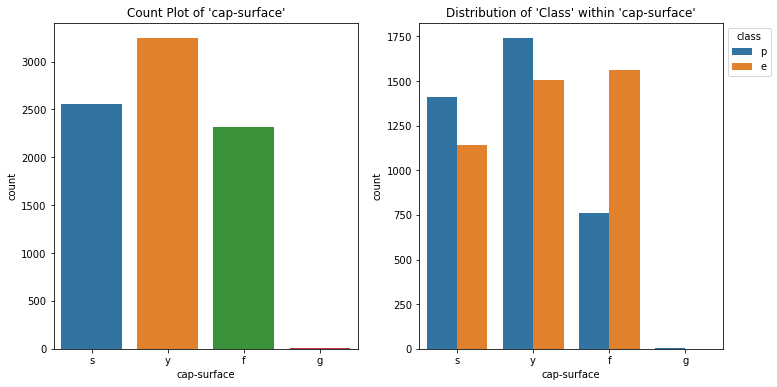

In [21]:
# 'Cap Surface'

visualizeCounts('cap-surface')

# LEFT FIGURE:
# It appears most of the values are relatively balanced (or slightly imbalanced) with the
# exception of cap surface 'g' which is a very significant minority.

# RIGHT FIGURE:
# Cap surfaces of 's' and 'y' seem to be relatively balanced in relation to class breakdown
# but 'f' looks to be more imbalanced. It is hard to identify an insight for 'g' with this
# visualization.

In [22]:
# Comparing the value counts (in relative percentage) for Cap Surface

valuePercentages('cap-surface')

# As we thought, the top three frequent values are relatively balanced (within ~10% count)
# but 'g' is a significant minority. In the current state this feature illustrates EXTREME
# imbalance (the minority category has < 1% total percentage).

cap-surface | Percentage
y    39.93
s    31.46
f    28.56
g     0.05
Name: cap-surface, dtype: float64


In [23]:
# Percentage of 'class' in each cap-surface

classPercentages('cap-surface')

# BALANCED: 's', 'y'
# MILD IMBALANCE: 'f'
# MODERATE IMBALANCE: N/A
# EXTREME IMBALANCE: 'g'

# Similar to the trend of the previous feature, the values with the highest counts are relatively
# balanced. The 'g' cap surface has 100% concentration of poisonous mushrooms however, as we 
# saw above, it makes up so little of our dataset that it could be an issue of sample size.

# To note, the cap surface of 'f' has a decent count and is mildly imbalanced relating to 'class'
# so this might be a beneficial indicator for predicting a mushroom as being poisonous or not.

            class       %
cap-surface              
f               e   67.24
f               p   32.76
g               p  100.00
s               e   44.76
s               p   55.24
y               e   46.36
y               p   53.64


### Cap Color

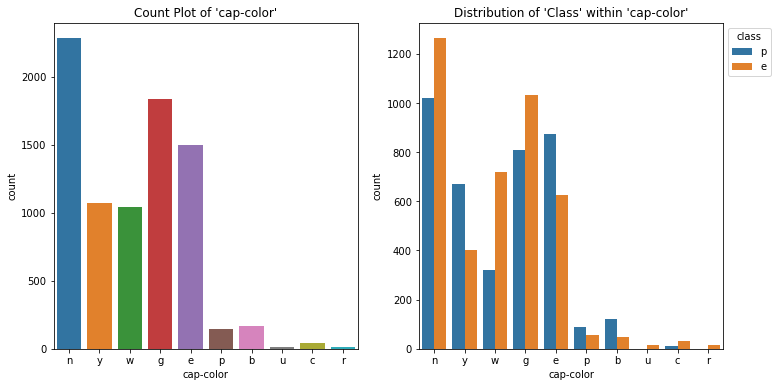

In [24]:
# 'Cap Color'

visualizeCounts('cap-color')

# LEFT FIGURE:
# We can see clear imbalance. 5 distinct values have medium to high counts while the other 5
# have significantly lower counts.

# RIGHT FIGURE:
# We can't clearly quantify the class balance of most features from this visualization however,
# it appears that 'y' and 'w' has slightly more imbalance than the other values.

In [25]:
# Quantifying the total counts of values within Cap Color

valuePercentages('cap-color')

# As the minority values of 'u' and 'r' have total count percentages <1%, this feature has
# EXTREME imbalance.

# The 5 least frequent values make up < 5% of our total dataset.

cap-color | Percentage
n    28.11
g    22.65
e    18.46
y    13.20
w    12.80
b     2.07
p     1.77
c     0.54
u     0.20
r     0.20
Name: cap-color, dtype: float64


In [26]:
# Breakdown of 'class' within Cap Color

classPercentages('cap-color')

# BALANCED: 'e', 'g', 'n'
# MILD IMBALANCE: 'b', 'c', 'p', 'w', 'y'
# MODERATE IMBALANCE: N/A
# EXTREME IMBALANCE: 'r', 'u'

# In our relatively frequent values from above, the values of 'w' and 'y' are also imbalanced
# so they might be useful for determining the 'class' of a mushroom.
# As expected from the previous trend, the values with extreme imbalance are very small minorities
# in terms of overall counts and have 100% class concentration so it is possibly an issue of
# sample size.

          class       %
cap-color              
b             e   28.57
b             p   71.43
c             e   72.73
c             p   27.27
e             e   41.60
e             p   58.40
g             e   56.09
g             p   43.91
n             e   55.34
n             p   44.66
p             e   38.89
p             p   61.11
r             e  100.00
u             e  100.00
w             e   69.23
w             p   30.77
y             e   37.31
y             p   62.69


### Bruises

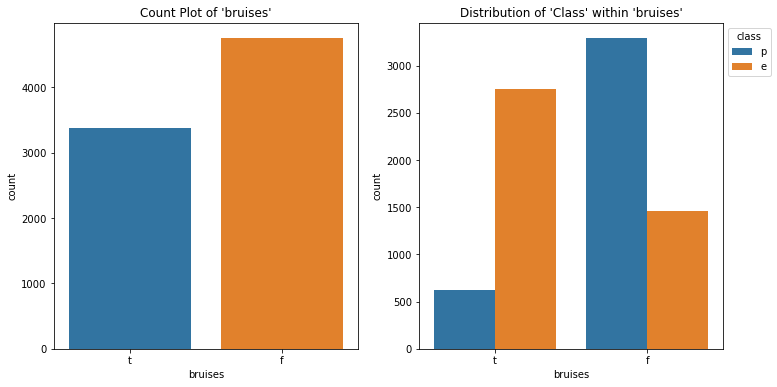

In [27]:
# 'Bruises'

visualizeCounts('bruises')

# LEFT FIGURE:
# The two values in this feature seem to be relatively balanced (or perhaps barely imbalanced).

# RIGHT FIGURE:
# Surprisingly, both distinct values in this feature seem to have imbalance in relation to 'class'
# concentration. We'll quantify this shortly but this could turn out to be a useful find.

In [28]:
# Quantifying count percentage per value in Bruises

valuePercentages('bruises')

# Since the minority category of 't' has a percenage >40%, this feature can be considered BALANCED.

bruises | Percentage
f    58.44
t    41.56
Name: bruises, dtype: float64


In [29]:
# Breakdown of 'class' within each value of Bruises

classPercentages('bruises')

# BALANCED: N/A
# MILD IMBALANCE: 'f'
# MODERATE IMBALANCE: 't'
# EXTREME IMBALANCE: N/A

# Both distinct values are imbalanced relative to 'class' concentration. Mushrooms with bruises are predominantly
# edible while mushrooms without bruises are predominantly poisonous. Since the distinct bruises categories have
# opposite class majorities, this feature will probably be beneficial for correctly predicting the class of mushrooms.

        class      %
bruises             
f           e  30.67
f           p  69.33
t           e  81.52
t           p  18.48


### Odor

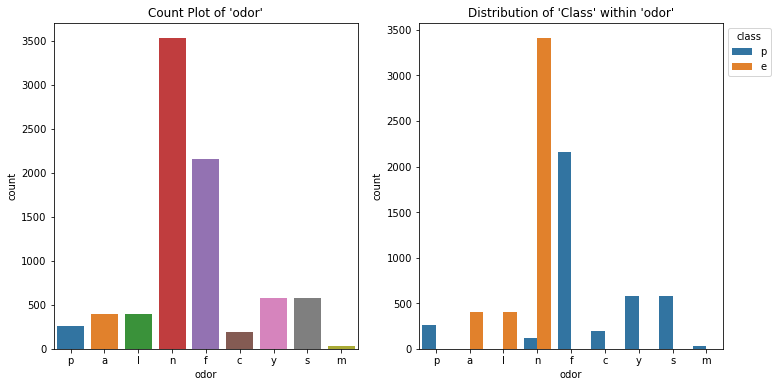

In [30]:
# 'Odor'

visualizeCounts('odor')

# LEFT FIGURE:
# We can see clear imbalance in this feature. There counts of 'n' and 'f' odors are much larger compared to the other
# categories such as 'p', 'c', and 'm'.

# RIGHT FIGURE:
# There appears to be significant class imbalance in most of the odor categories. Odors of 'n' and 'f' will probably
# be the best for our models as they have high counts and high imbalance but we need to see if there is 100% class
# concentrations in many categorie as the minority class bars are hard to see.

In [31]:
# Quantifying count percentage for distinct values in Odor

valuePercentages('odor')

# Since the minority category of 'm' is < 1% of the total count, this feature has EXTREME IMBALANCE.
# It seems the two most frequent values of 'n' and 'f' make up roughly 65% of the total counts leaving the other 35%
# for the other 7 categories!

odor | Percentage
n    43.43
f    26.59
y     7.09
s     7.09
a     4.92
l     4.92
p     3.15
c     2.36
m     0.44
Name: odor, dtype: float64


In [32]:
# Breakdown of 'class' within each Odor category

classPercentages('odor')

# BALANCED: N/A
# MILD IMBALANCE: N/A 
# MODERATE IMBALANCE: N/A 
# EXTREME IMBALANCE:  'a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y'

# Wow. It looks like all distinct categories in Odor are Extremely Imbalanced. As expected, most of the values that were
# hard to quantify relative to minority concentrations have 100% class concentration.
# It is unlikely that most of these odor values will lend predictive power as their counts are so low but as we mentioned
# while viewing the histograms, 'n' and 'f' have relatively high counts and opposite class majorities so they might be
# useful for correctly classifying mushrooms.

     class      %
odor             
a        e  100.0
c        p  100.0
f        p  100.0
l        e  100.0
m        p  100.0
n        e   96.6
n        p    3.4
p        p  100.0
s        p  100.0
y        p  100.0


### Gill Attachment

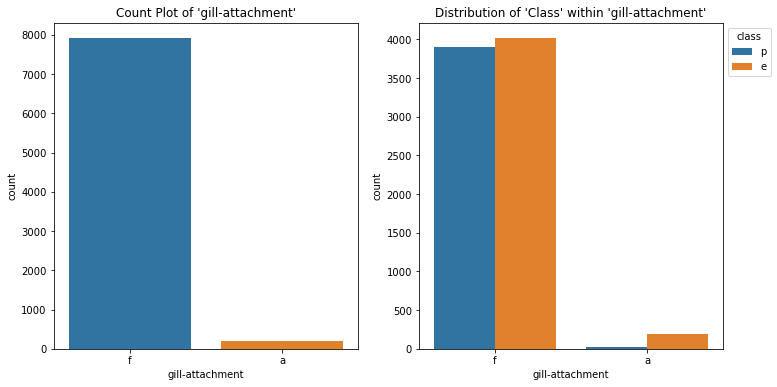

In [33]:
# 'Gill Attachment'

visualizeCounts('gill-attachment')

# LEFT FIGURE:
# Visually, this feature appears extremely imbalanced. Most mushrooms have gill-attachment values of 'f' compared to 'a'.

# RIGHT FIGURE:
# It appears the 'f' category is relatively balanced. It is hard to quantify the 'class' balance of 'a' but it is probably
# imbalanced.

In [34]:
# Quantifying counts of values in 'Gill Attachment'

valuePercentages('gill-attachment')

# Since the minority category of 'a' has a count percentage between 1% and 20%, this feature has MODERATE IMBALANCE.

gill-attachment | Percentage
f    97.42
a     2.58
Name: gill-attachment, dtype: float64


In [35]:
# 'Class' breakdown per value in 'Gill Attachment'

classPercentages('gill-attachment')

# BALANCED: 'f'
# MILD IMBALANCE: N/A
# MODERATE IMBALANCE: 'a'
# EXTREME IMBALANCE: N/A

# As we expected, 'f' is considered balanced relative to 'class'. Since it also makes up the large majority of values
# in the gill-attachment feature, this feature will probably not be very useful for correct mushroom classification.
# The 'a' category has moderate imbalance but it is possibly a result of small sample size. It may be predictive though.

                class      %
gill-attachment             
a                   e  91.43
a                   p   8.57
f                   e  50.75
f                   p  49.25


### Gill Spacing

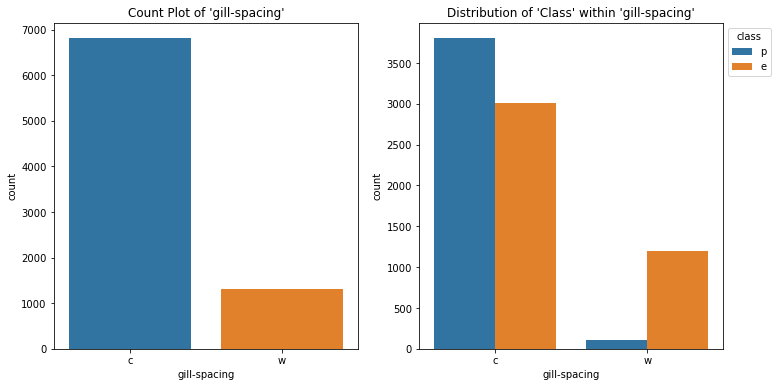

In [36]:
# 'Gill Spacing'

visualizeCounts('gill-spacing')

# LEFT FIGURE:
# This feature appears moderately imbalanced with a majority of 'c' values and minority of 'w' values.

# RIGHT FIGURE:
# The 'c' category appears relatively balanced relative to 'class' breakdown but 'w' appears moderate-extremely imbalanced.

In [37]:
# Quantifying counts of values in 'Gill Spacing'

valuePercentages('gill-spacing')

# Since the minority value 'w' has a count percentage >1% and <20%, this feature has MODERATE IMBALANCE.

gill-spacing | Percentage
c    83.85
w    16.15
Name: gill-spacing, dtype: float64


In [38]:
# Class breakdown per value in 'Gill Spacing'

classPercentages('gill-spacing')

# BALANCED: 'c'
# MILD IMBALANCE: N/A
# MODERATE IMBALANCE: 'w'
# EXTREME IMBALANCE: N/A

# The count majority category of 'c' is balanced but the minority category of 'w' has moderate imbalance. As the count
# percentage of 'w' is nearly 1/5 of the total values in the feature, mushrooms with this value for 'gill spacing' might
# be useful for correctly classifying mushrooms but this is probably not the case for those with values of 'c'.

             class      %
gill-spacing             
c                e  44.16
c                p  55.84
w                e  91.46
w                p   8.54


### Gill Size

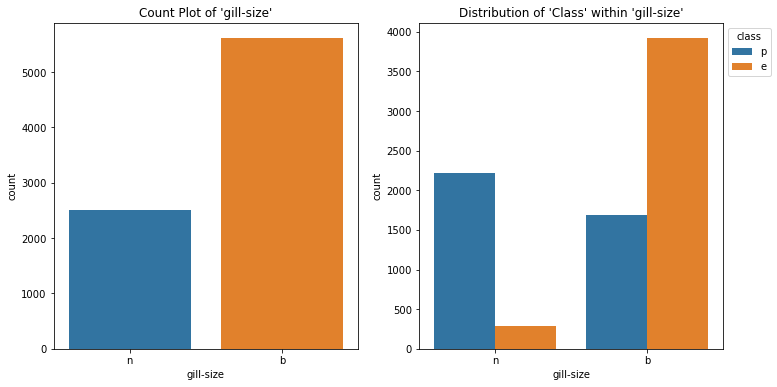

In [39]:
# 'Gill Size'

visualizeCounts('gill-size')

# LEFT FIGURE:
# This features appears mild-moderately imbalanced with a majority of 'b' values and minority of 'n' values.

# RIGHT FIGURE:
# Both distinct 'gill size' categories appear imbalanced relative to 'class' breakdown. Furthermore, 'n' has a majority of
# poisonous mushrooms while 'b' has a majority of edible mushrooms. This shows potential for predictive significance.

In [40]:
# Quantifying counts for values in 'Gill Size'

valuePercentages('gill-size')

# Since the minority category 'n' has a count percentage between 20% and 40%, this feature has MILD IMBALANCE.

gill-size | Percentage
b    69.08
n    30.92
Name: gill-size, dtype: float64


In [41]:
# Class balance in each value of 'Gill Size'

classPercentages('gill-size')

# BALANCED: N/A
# MILD IMBALANCE: 'b'
# MODERATE IMBALANCE: 'n'
# EXTREME IMBALANCE: N/A

# Both categories of 'gill size' have imbalance relative to 'class'. This is a good sign as there isn't a significant
# imbalance in the counts of the categories meaning the 'class' imabalance is likely not an issue of sample size.
# This feature will likely be beneficial for correct mushroom classification.

          class      %
gill-size             
b             e  69.85
b             p  30.15
n             e  11.46
n             p  88.54


### Gill Color

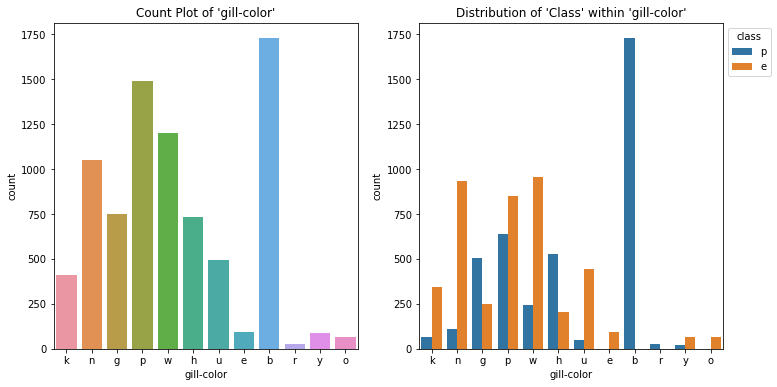

In [42]:
# 'Gill Color'

visualizeCounts('gill-color')

# LEFT FIGURE:
# We can see there are many distinct values in this feature. While there is extreme imbalance relative to the majority
# and minority categories, most of the distinct values in this feature have count percentages within an acceptable range.
# Most of the feature is balanced with the exception of 4 to 5 categories.

# RIGHT FIGURE:
# It is hard to quantify the significance of imbalance in 'e', 'b', 'r', and 'o', but the categories to the left of the
# plot have decent counts and some imbalance. A few of those categories may lend predictive power.

In [43]:
# Quantifying counts for values in 'Gill Color'

valuePercentages('gill-color')

# Since the minority category of 'r' has a count percentage <1%, this feature has EXTREME IMBALANCE.
# However, the most frequent 6 categories have count percentages close to 10-20% of the total so they may be useful.

gill-color | Percentage
b    21.27
p    18.37
w    14.80
n    12.90
g     9.26
h     9.01
u     6.06
k     5.02
e     1.18
y     1.06
o     0.79
r     0.30
Name: gill-color, dtype: float64


In [44]:
# 'Class' balance within values of 'Gill Color'

classPercentages('gill-color')

# BALANCED: 'p'
# MILD IMBALANCE: 'g', 'h', 'w', 'y'
# MODERATE IMBALANCE: 'k', 'n', 'u'
# EXTREME IMBALANCE: 'b', 'e', 'o', 'r'

# Categories with very low count percentages and high 'class' imbalance may result in false classification in our model
# due to small sample sizes (e.g. 'e', 'o', 'r').
# Categories with high counts and relative imbalance are probably the best for accurate mushroom classification. The values
# of 'w' and 'n' satisfy these conditions.

           class       %
gill-color              
b              p  100.00
e              e  100.00
g              e   32.98
g              p   67.02
h              e   27.87
h              p   72.13
k              e   84.31
k              p   15.69
n              e   89.31
n              p   10.69
o              e  100.00
p              e   57.10
p              p   42.90
r              p  100.00
u              e   90.24
u              p    9.76
w              e   79.53
w              p   20.47
y              e   74.42
y              p   25.58


### Stalk Shape

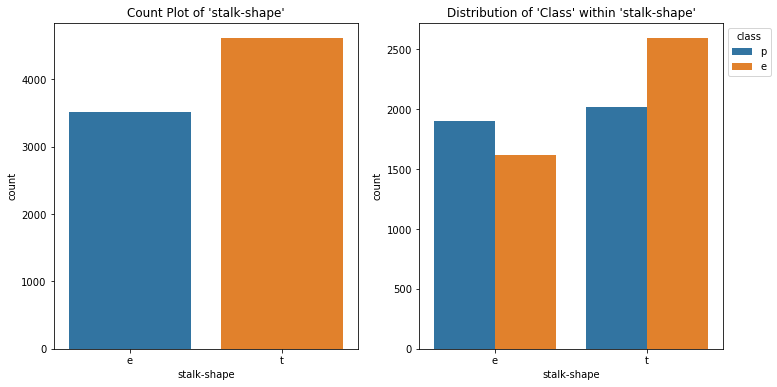

In [45]:
# 'Stalk Shape'

visualizeCounts('stalk-shape')

# lEFT FIGURE:
# This feature appears relatively balance. There is a slight majority of 't' values.

# RIGHT FIGURE:
# Relative to 'class' balance within each category, the values in this feature appear relatively balanced once again.

In [46]:
# Quantifying counts of values in 'Stalk Shape'

valuePercentages('stalk-shape')

# Since the minority category of 'e' has a count percentage >40%, this feature is BALANCED.

stalk-shape | Percentage
t    56.72
e    43.28
Name: stalk-shape, dtype: float64


In [47]:
classPercentages('stalk-shape')

# BALANCED: 'e', 't'
# MILD IMBALANCE: N/A
# MODERATE IMBALANCE: N/A
# EXTREME IMBALANCE: N/A

# Since all distinct categories in this feature are balanced relative to 'class', this feature probably won't be very
# beneficial in properly classifying mushrooms.

            class      %
stalk-shape             
e               e  45.96
e               p  54.04
t               e  56.25
t               p  43.75


### Stalk Root

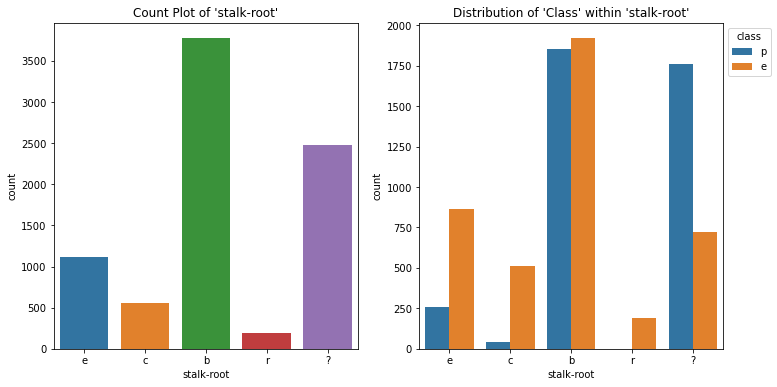

In [48]:
# 'Stalk Root'

visualizeCounts('stalk-root')

# lEFT FIGURE:
# This feature appears pretty imbalanced. There is a large majority of 'b' values followed by '?' which was likely included
# during data preparation to represent mushrooms with unknown 'stalk root'. 

# RIGHT FIGURE:
# Our majority category of 'b' is balanced while the minority value 'r' likely has 100% class concentration leading to
# its appearance of extreme imbalance. Categories of 'e' and 'c' have relatively significant imbalance so they might
# be useful as they don't have terribly low counts either.

In [49]:
# Quantifying counts of values in 'Stalk Root'

valuePercentages('stalk-root')

# Since the minority category 'r' has a count percentage between 1% and 20%, this feature has MODERATE IMBALANCE.
# Roughly 1/3 of this feature has unknown values (marked as '?') and nearly half has the 'b' category which is likely
# not predictive as it is balanced relative to 'class'. This is somewhat concerning.

stalk-root | Percentage
b    46.48
?    30.53
e    13.79
c     6.84
r     2.36
Name: stalk-root, dtype: float64


In [50]:
# Breakdown of 'class' within values of 'Stalk Root'

classPercentages('stalk-root')

# BALANCED: 'b'
# MILD IMBALANCE: '?', 'e' 
# MODERATE IMBALANCE: 'c' 
# EXTREME IMBALANCE: 'r'

# As we expected, the 'r' category has 100% class concentration so this is likely an issue of sample size and may lead to
# false classification. Out of the remaining categories that are not balanced nor unknown, 'e' has more than 10% count
# percentage and is mildly imbalanced so it may be slightly predictive. The 'c' category has more imbalance but makes up
# roughly 7% of this feature so there is a possibility of an issue of small sample size here.

           class       %
stalk-root              
?              e   29.03
?              p   70.97
b              e   50.85
b              p   49.15
c              e   92.09
c              p    7.91
e              e   77.14
e              p   22.86
r              e  100.00


### Stalk Surface Above Ring

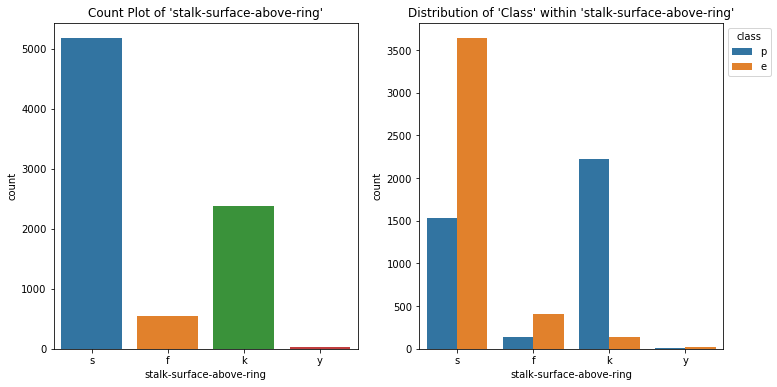

In [50]:
# 'Stalk Surface Above Ring'

visualizeCounts('stalk-surface-above-ring')

# lEFT FIGURE:
# There is clear imbalance here. This feature is dominated by 's' values with very few 'f' and 'y' values. There is likely
# extreme imbalance.

# RIGHT FIGURE:
# It appears that all categories of 'stalk surface above ring' have imbalance relative to 'class'. The two most frequent
# categories, 's' and 'k' have opposite class majorities (which is good) so this feature might be beneficia for prediction
# after all.

In [51]:
# Quantifying counts of values in 'Stalk Surface Above Ring'

valuePercentages('stalk-surface-above-ring')

# Since the minority category of 'y' has count percentage < 1%, this feature has EXTREME IMBALANCE.
# The two most frequent categories of 's' and 'k' comprise over 90% of the total feature values.

stalk-surface-above-ring | Percentage
s    63.71
k    29.20
f     6.79
y     0.30
Name: stalk-surface-above-ring, dtype: float64


In [52]:
# 'Class' breakdown within values of 'Stalk Surface Above Ring'

classPercentages('stalk-surface-above-ring')

# BALANCED: N/A
# MILD IMBALANCE: 'f', 's', 'y'
# MODERATE IMBALANCE: 'k'
# EXTREME IMBALANCE: N/A

# All categories in this feature are imbalanced. Fortunately, there are no 100% class concentrations like in other features.
# The most promising categories for accurate prediction are 's' and 'k' which have relatively high counts and imbalance 
# (while also having opposite class majorities within them).

                         class      %
stalk-surface-above-ring             
f                            e  73.91
f                            p  26.09
k                            e   6.07
k                            p  93.93
s                            e  70.32
s                            p  29.68
y                            e  66.67
y                            p  33.33


### Stalk Surface Below Ring

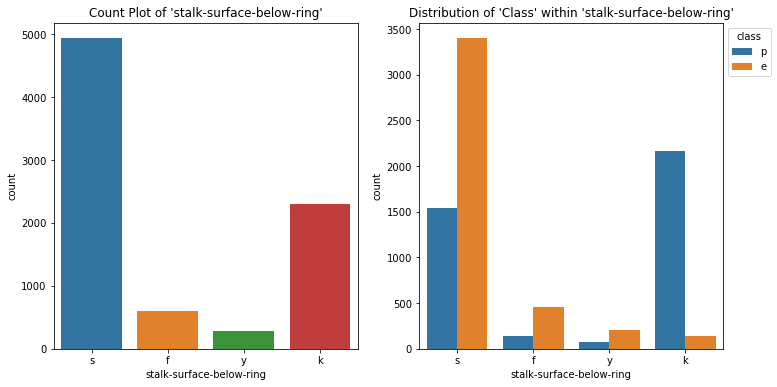

In [53]:
# 'Stalk Surface Below Ring'

visualizeCounts('stalk-surface-below-ring')

# lEFT FIGURE:
# This feature is quite imbalanced with majorities of 's' and 'k' values and minorities in 'f' and 'y'.

# RIGHT FIGURE:
# It appears that all categories in this feature are imbalanced. Note the class majorities in our most frequent categories
# of 's' and 'k'.

In [54]:
# Quantifying counts of values in 'Stalk Surface Below Ring'

valuePercentages('stalk-surface-below-ring')

# Since the minority category 'y' has a count percentage between 1% and 20%, this feature has MODERATE IMBALANCE.

stalk-surface-below-ring | Percentage
s    60.76
k    28.36
f     7.39
y     3.50
Name: stalk-surface-below-ring, dtype: float64


In [55]:
# Class concentration in values of 'Stalk Surface Below Ring'

classPercentages('stalk-surface-below-ring')

# BALANCED: N/A
# MILD IMBALANCE: 'f', 's', 'y'
# MODERATE IMBALANCE: 'k'
# EXTREME IMBALANCE: N/A

# As we saw in the above visualizations, all categories in this feature are imbalanced relative to 'class'.
# The categories of 's' and 'k' have high relatively high total counts, mild to moderate class imbalance, and opposite
# class majorities making them favorable for contributing to predictive power.

                         class      %
stalk-surface-below-ring             
f                            e  76.00
f                            p  24.00
k                            e   6.25
k                            p  93.75
s                            e  68.88
s                            p  31.12
y                            e  73.24
y                            p  26.76


### Stalk Color Above Ring

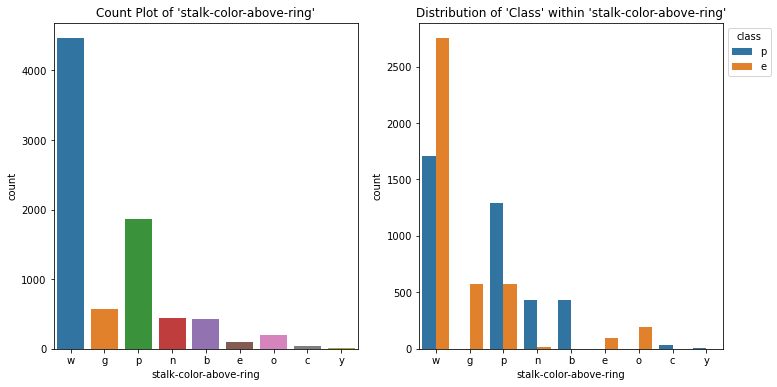

In [56]:
# 'Stalk Color Above Ring'

visualizeCounts('stalk-color-above-ring')

# lEFT FIGURE:
# Without a doubt, this feature has extreme imbalance. The 'w' category comprises the large majority of values while
# categories such as 'e', 'o', 'c', and 'y' are significant minorities.

# RIGHT FIGURE:
# The categories of 'w' and 'p' have imbalance but it hard to assess the other categories in this visualization.

In [57]:
# Quantifying counts of vaklues in 'Stalk Color Above Ring'

valuePercentages('stalk-color-above-ring')

# Since the minority category of 'y' has a count percentage <1%, this feature has EXTREME IMBALANCE.
# The two most frequent categories comprise ~75% of the entire feature.

stalk-color-above-ring | Percentage
w    54.95
p    23.04
g     7.09
n     5.51
b     5.32
o     2.36
e     1.18
c     0.44
y     0.10
Name: stalk-color-above-ring, dtype: float64


In [58]:
# 'Class' concentration per value in 'Stalk Color Above Ring'

classPercentages('stalk-color-above-ring')

# BALANCED: N/A
# MILD IMBALANCE: 'p', 'w'
# MODERATE IMBALANCE: 'n'
# EXTREME IMBALANCE: 'b', 'c', 'e', 'g', 'o', 'y'

# Many of the categories in this feature are extremely imbalanced relative to 'class'.
# Filtering for categories with relatively high value counts and 'class' imbalance, we should focus on 'w' and 'p'.
# They also have opposite class concentrations which is favorable.

                       class       %
stalk-color-above-ring              
b                          p  100.00
c                          p  100.00
e                          e  100.00
g                          e  100.00
n                          e    3.57
n                          p   96.43
o                          e  100.00
p                          e   30.77
p                          p   69.23
w                          e   61.65
w                          p   38.35
y                          p  100.00


### Stalk Color Below Ring

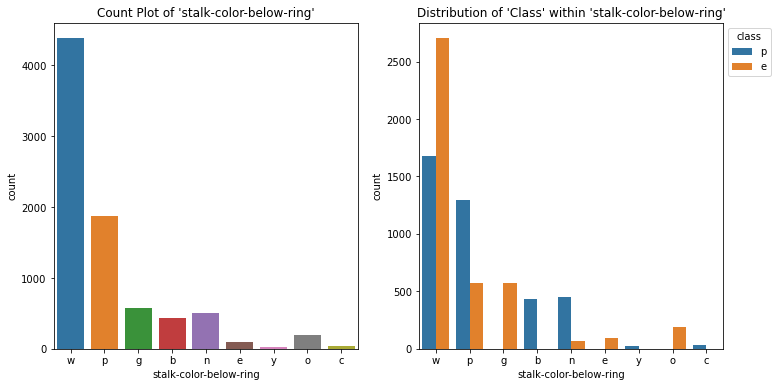

In [59]:
# 'Stalk Color Below Ring'

visualizeCounts('stalk-color-below-ring')

# lEFT FIGURE:
# This feature has extreme imbalance with significant disparity between the majority 'w' and the minority 'y'.

# RIGHT FIGURE:
# Similar to 'stalk color above ring', this most of these categories appear imbalanced relative to 'class'.
# The categories of 'w', 'p', 'g', and 'b' look promising.

In [60]:
# Quantifying counts of values in 'Stalk Color Below Ring'

valuePercentages('stalk-color-below-ring')

# Since the minority category of 'y' has a count percentage < 1%, this feature has EXTREME IMBALANCE.

stalk-color-below-ring | Percentage
w    53.96
p    23.04
g     7.09
n     6.30
b     5.32
o     2.36
e     1.18
c     0.44
y     0.30
Name: stalk-color-below-ring, dtype: float64


In [61]:
# 'Class' concentration within values of 'Stalk Color Below Ring'

classPercentages('stalk-color-below-ring')

# BALANCED: N/A
# MILD IMBALANCE: 'p', 'w'
# MODERATE IMBALANCE: 'n'
# EXTREME IMBALANCE: 'b', 'c', 'e', 'g', 'o'

# Many features are extremely imbalanced with 100% class concentration while also having very low value counts.
# 'w' and 'p' both have relatively high counts but are only mildly imbalanced ('w' is close to being considered balanced).
# This feature might not be very predictive.

                       class       %
stalk-color-below-ring              
b                          p  100.00
c                          p  100.00
e                          e  100.00
g                          e  100.00
n                          e   12.50
n                          p   87.50
o                          e  100.00
p                          e   30.77
p                          p   69.23
w                          e   61.68
w                          p   38.32
y                          p  100.00


### Veil Type

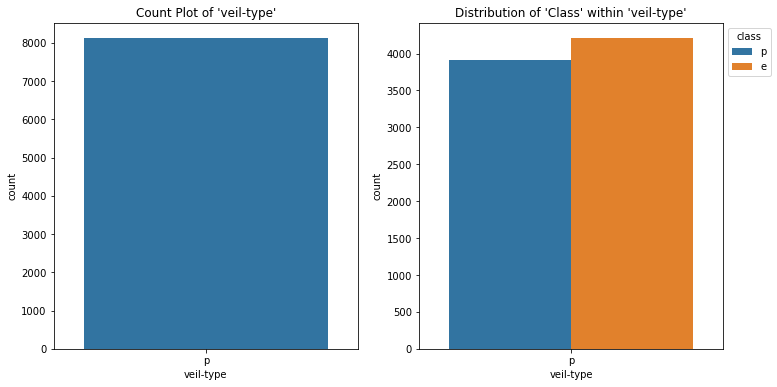

In [62]:
# 'Veil Type'

visualizeCounts('veil-type')

# lEFT FIGURE:
# This is a special case where there is only one distinct category in the entire feature!

# RIGHT FIGURE:
# Relative to 'class' this feature is balanced but due to it all belonging to one category, it is just a representation
# of the 'class' feature. No new information is gained from this feature so we can probably remove it from the dataset.

In [63]:
# Quantifying counts of values in 'Veil Type'

valuePercentages('veil-type')

# As we saw above, the single 'p' category comprises all values in this feature.

veil-type | Percentage
p    100.0
Name: veil-type, dtype: float64


In [64]:
classPercentages('veil-type')

# BALANCED: 'p'
# MILD IMBALANCE: N/A
# MODERATE IMBALANCE: N/A
# EXTREME IMBALANCE: N/A

# The only category is balanced relative to 'class' meaning it won't contribute to significantly to predictive power.

          class     %
veil-type            
p             e  51.8
p             p  48.2


### Veil Color

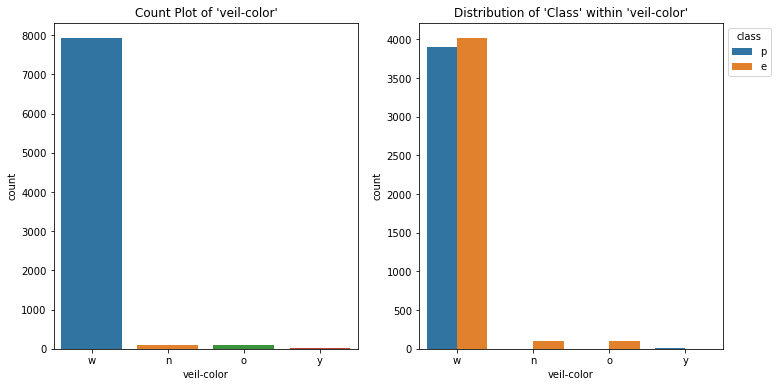

In [65]:
# 'Veil Color'

visualizeCounts('veil-color')

# lEFT FIGURE:
# This feature is extremely imbalanced. Furthermore, one category 'w' dominates the feature while the other three categories
# have significantly lower value counts.

# RIGHT FIGURE:
# Disregarding the categories with very low value counts, the 'w' category appears balanced. This entire feature will
# likely not lend to predictive power.

In [66]:
# Quantifying counts of values in 'Veil Color'

valuePercentages('veil-color')

# Since the minority category of 'y' has a count percentage < 1%, this feature has EXTREME IMBALANCE.

veil-color | Percentage
w    97.54
n     1.18
o     1.18
y     0.10
Name: veil-color, dtype: float64


In [67]:
classPercentages('veil-color')

# BALANCED: 'w'
# MILD IMBALANCE: N/A
# MODERATE IMBALANCE: N/A
# EXTREME IMBALANCE: 'n', 'o', 'y'

# As expected, the three infrequent categories have 100% class concentrations. This is problematic as predictions made
# considering these values will likely produce false classifications due to small sample size.
# Furthermore, the only other category 'w' is balanced relative to 'class'. Therefore, no category in this feature has
# much potential in lending to overall predictive power.

           class       %
veil-color              
n              e  100.00
o              e  100.00
w              e   50.68
w              p   49.32
y              p  100.00


### Ring Number

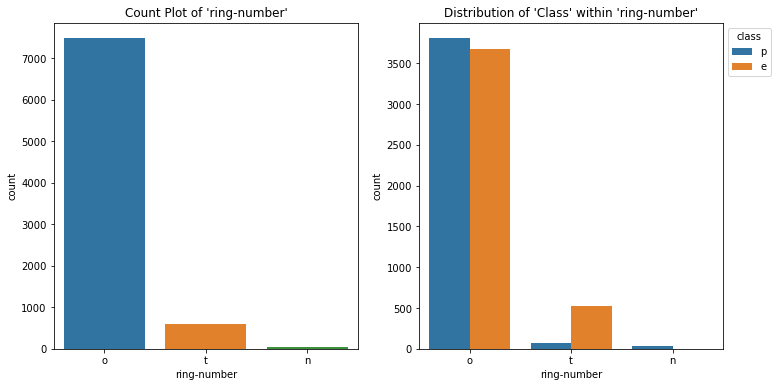

In [68]:
# 'Ring Number'

visualizeCounts('ring-number')

# lEFT FIGURE:
# This feature appears to be extremely imbalanced with significant disparity between 'o' and 'n'.

# RIGHT FIGURE:
# Disregarding 'n', the most frequent 'o' category appears balanced. The 't' category is imbalanced but with a small
# total value count, it might be too significant in the final model.

In [69]:
# Quantifying counts of values in 'Ring Number'

valuePercentages('ring-number')

# Since the minority category of 'n' has a count percentage < 1%, this feature has EXTREME IMBALANCE.

ring-number | Percentage
o    92.17
t     7.39
n     0.44
Name: ring-number, dtype: float64


In [70]:
classPercentages('ring-number')

# BALANCED: 'o'
# MILD IMBALANCE: N/A
# MODERATE IMBALANCE: 't'
# EXTREME IMBALANCE: 'n'

# The most frequent category, 'o', is nearly perfectly balanced and the least frequent 'n' has 100% class concentration so
# we should ignore it. That leaves 't' with moderate 'class' imbalance but only making up 7% of the total feature.
# This would be another feature to consider removing during dimensionality reduction.

            class       %
ring-number              
n               p  100.00
o               e   49.15
o               p   50.85
t               e   88.00
t               p   12.00


### Ring Type (IN PROGRESS)

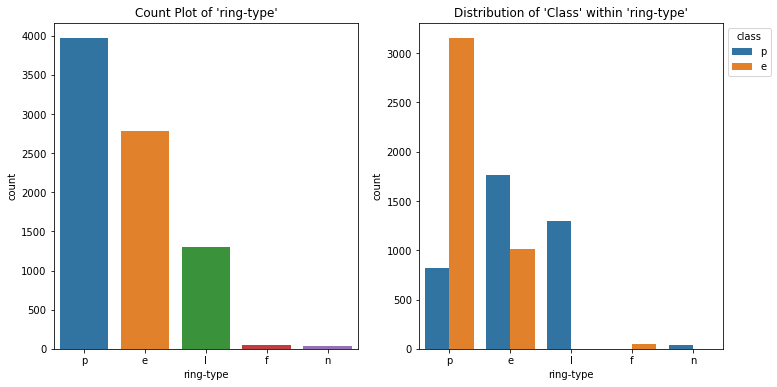

In [71]:
# 'Ring Type'

visualizeCounts('ring-type')

# lEFT FIGURE:
# 

# RIGHT FIGURE:
# 

In [72]:
valuePercentages('ring-type')

ring-type | Percentage
p    48.84
e    34.17
l    15.95
f     0.59
n     0.44
Name: ring-type, dtype: float64


In [73]:
classPercentages('ring-type')

# BALANCED:
# MILD IMBALANCE:
# MODERATE IMBALANCE:
# EXTREME IMBALANCE:

#

          class       %
ring-type              
e             e   36.31
e             p   63.69
f             e  100.00
l             p  100.00
n             p  100.00
p             e   79.44
p             p   20.56


### Spore Print Color

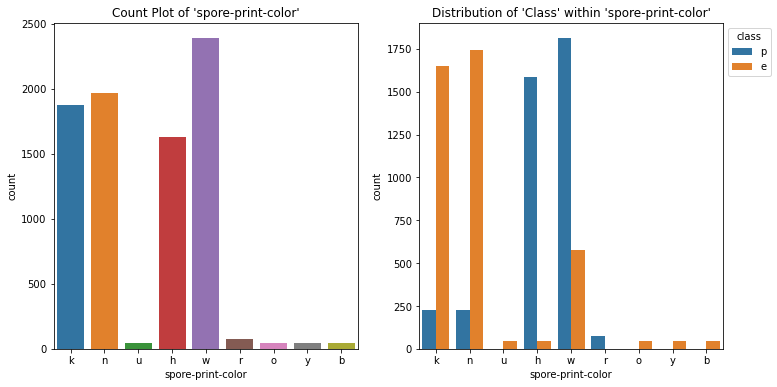

In [74]:
# 'Spore Print Color'

visualizeCounts('spore-print-color')

# lEFT FIGURE:
#

# RIGHT FIGURE:
# 

In [75]:
valuePercentages('spore-print-color')

spore-print-color | Percentage
w    29.39
n    24.22
k    23.04
h    20.09
r     0.89
u     0.59
o     0.59
y     0.59
b     0.59
Name: spore-print-color, dtype: float64


In [76]:
classPercentages('spore-print-color')

# BALANCED:
# MILD IMBALANCE:
# MODERATE IMBALANCE:
# EXTREME IMBALANCE:

#

                  class       %
spore-print-color              
b                     e  100.00
h                     e    2.94
h                     p   97.06
k                     e   88.03
k                     p   11.97
n                     e   88.62
n                     p   11.38
o                     e  100.00
r                     p  100.00
u                     e  100.00
w                     e   24.12
w                     p   75.88
y                     e  100.00


### Population

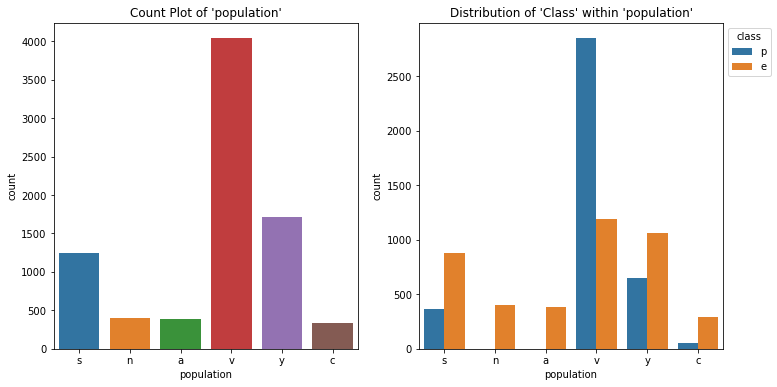

In [77]:
# 'Population'

visualizeCounts('population')

# lEFT FIGURE:
#

# RIGHT FIGURE:
# 

In [78]:
valuePercentages('population')

population | Percentage
v    49.73
y    21.07
s    15.36
n     4.92
a     4.73
c     4.19
Name: population, dtype: float64


In [79]:
classPercentages('population')

# BALANCED:
# MILD IMBALANCE:
# MODERATE IMBALANCE:
# EXTREME IMBALANCE:

#

           class       %
population              
a              e  100.00
c              e   84.71
c              p   15.29
n              e  100.00
s              e   70.51
s              p   29.49
v              e   29.50
v              p   70.50
y              e   62.15
y              p   37.85


### Habitat

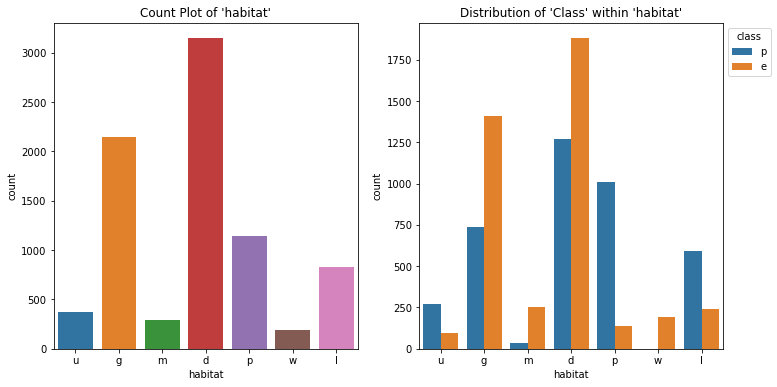

In [80]:
# 'Habitat'

visualizeCounts('habitat')

# lEFT FIGURE:
#

# RIGHT FIGURE:
# 

In [81]:
valuePercentages('habitat')

habitat | Percentage
d    38.75
g    26.44
p    14.08
l    10.24
u     4.53
m     3.59
w     2.36
Name: habitat, dtype: float64


In [82]:
classPercentages('habitat')

# BALANCED:
# MILD IMBALANCE:
# MODERATE IMBALANCE:
# EXTREME IMBALANCE:

#

        class       %
habitat              
d           e   59.72
d           p   40.28
g           e   65.55
g           p   34.45
l           e   28.85
l           p   71.15
m           e   87.67
m           p   12.33
p           e   11.89
p           p   88.11
u           e   26.09
u           p   73.91
w           e  100.00


### Each Feature vs. Target Feature

In [ ]:
for column in rawData.columns[1:]:
    sns.countplot(data=rawData, x=column, hue='class')
    plt.title(f"Distribution of 'Class' per '{column}''")
    plt.show()

In [ ]:
sns.countplot(data=rawData, x='cap-shape', hue='class')
plt.title('Count Plot of "Cap Shape"')
plt.show()

### Feature Correlation

## Machine Learning Intuition

Now that we have verified that the dataset is "clean" (no missing values, no duplicates, no typos, etc.), and have explored the distributions and relationships between them, it is time to think about how we should solve our problem of correctly predicting whether new mushrooms with certain attributes are poisonous or edible.  

Since we are trying to predict which distinct category a new mushroom belongs to (being edible or poisonous), this is a Classification task.  

Furthermore, since the attribute we are trying to predict has TWO categories, this is a Binary Classification task (compared to a multiclass problem).

Lastly, since all of our observations have an existing category assigned to them, they are all 'labeled', meaning we are dealing with a Supervised machine learning task. Therefore, we can summarize our task as being Supervised Binary Classification.

Now that we know the task we are trying to solve, we can think about which machine learning models we want to use. There are many popular Supervised Classification ML models that have various benefits and drawbacks. This project will give us an opportunity to compare a few of them and see which one performs the best with our data.

The machine learning models we will be comparing in this project are:
- Logistic Regression
- K Nearest Neighbors Classifer
- Support Vector Machine Classifier
- Naive Bayes Classifer
- Single Decision Tree  

and a few Ensemble methods that build on Decision Trees including:
- Random Forest Classifer
- AdaBoost Classifer
- Gradient Boost Classifer

**Note:** We will save Neural Networks for a separate project!

## Preprocessing

## Model Creation and Training

## Model Evaluation

## Best Model Selection and Dataset Insights

## Model Generalization

## Model Productionization

## Next Steps